1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probability to observe more than 15 hurricanes in a year is: 0.0013726297097147906


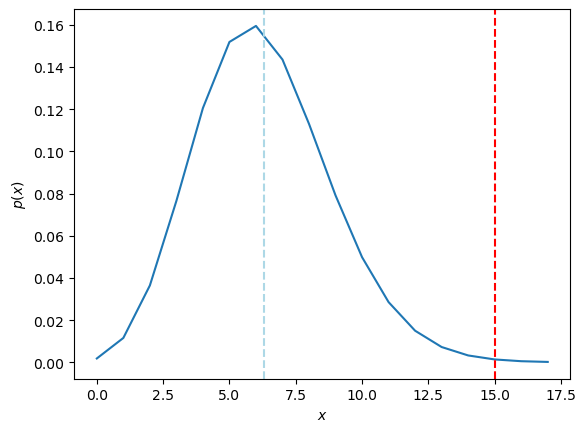

Z = 3.4661629670697414


In [20]:
import numpy as np
from numpy import random
from scipy import stats
from math import sqrt, pi, erf
import matplotlib.pyplot as plt

# We are interested in the probability of observing more than 15 hurricanes  in a single year (mathematically: 𝑘>15)

mu = 6.3
x0 = 15
var = mu
#Probability mass function
k = np.arange(0, 18)
pmf = stats.poisson.pmf(k, mu)

pmf_15 = stats.poisson.pmf(15, mu)
print('The probability to observe more than 15 hurricanes in a year is:', pmf_15)
# The probability is really small.

plt.plot(k, pmf)
plt.axvline(x0, linestyle='--', color='red', label=r'$\bar{x}$')
plt.axvline(mu, linestyle='--', color='lightblue', label='$\mu$')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

# Determine the Z score
Z = abs(x0 - mu) / sqrt(var)
print("Z =", Z)
# Z-score is larger than 3 so the probability to get 15 or more hurricanes in a single year that we obtaines
# is significant. As it's really small, the number of 15 hurricanes in 2005 is significantly different.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [23]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre) 
sample1_mean = np.mean(pre)
sample2_mean = np.mean(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_1**2 + sigma_2**2)/2)
# calculate the test statistics
T = (sample1_mean - sample2_mean) / (sigma * np.sqrt(2/n))
print("T =", abs(T))

# Let's choose our level of significance, 5% so 0.05.
# Now let's compute the p-value.
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

print("Since the p-value is <𝛼, we do not accept the null hypothesis")
print("The change in blood pressure is significant")

T = 3.786997938137629
p-value = 0.004302464132864604
Since the p-value is <𝛼, we do not accept the null hypothesis
The change in blood pressure is significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Maximum temperatures: 

parameters:
 [  5.73581521   2.29442961 132.80897543  15.77935753]
covariance matrix:
 [[ 6.31515553e-03 -2.12247154e-04 -2.15127985e-02  1.91661228e-03]
 [-2.12247154e-04  2.75448288e-02  2.17806736e+00 -1.70940862e-01]
 [-2.15127985e-02  2.17806736e+00  2.03810343e+02 -1.61259440e+01]
 [ 1.91661228e-03 -1.70940862e-01 -1.61259440e+01  1.38438219e+00]]

 Minimum temperatures: 

parameters:
 [  6.16452593   1.97589995 260.76386719 -61.32093404]
covariance matrix:
 [[ 2.22850188e-03 -4.92565478e-05 -1.08269424e-02  1.09104461e-03]
 [-4.92565478e-05  5.77328473e-03  8.74436304e-01 -7.06521751e-02]
 [-1.08269424e-02  8.74436304e-01  1.78561168e+02 -1.45310912e+01]
 [ 1.09104461e-03 -7.06521751e-02 -1.45310912e+01  1.41331124e+00]]

offset_mini -62
offset_maxi 17


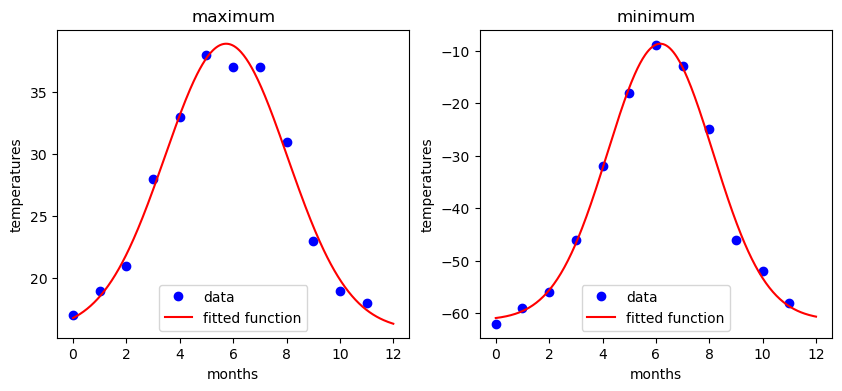

In [109]:
maxi=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mini=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = np.arange(12)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, maxi, 'bo', label='data')
plt.title('maximum')
plt.xlabel('months')
plt.ylabel('temperatures')
plt.subplot(1, 2, 2)
plt.plot(x, mini, 'bo', label='data')
plt.title('minimum')
plt.xlabel('months')
plt.ylabel('temperatures')

# The Gaussian function can describe well the maximum and minimum temperatures 

from scipy import optimize, stats

#Gaussian function
def f(months, mu, sig, ampl, offset):
    return (offset + ampl * stats.norm.pdf(months, mu,sig))

m= np.mean(x)
std_maxi = np.sqrt(np.var(maxi))
std_mini = np.sqrt(np.var(mini))

ampl_maxi = max(maxi) - min(maxi)
ampl_mini = max(maxi) - min(maxi)

offset_maxi = min(maxi)
offset_mini = min(mini)


res_max, cov_max = optimize.curve_fit(f, x, maxi, [m,std_maxi,ampl_maxi,offset_maxi])
res_min, cov_min = optimize.curve_fit(f, x, mini, [m,std_mini,ampl_mini,offset_mini])

print('Maximum temperatures: \n')
print("parameters:\n", res_max)
print("covariance matrix:\n", cov_max)
print('\n Minimum temperatures: \n')
print("parameters:\n", res_min)
print("covariance matrix:\n", cov_min)

days = np.linspace(0, 12, num=365)
plt.subplot(1, 2, 1)
plt.plot(days, f(days, *res_max), 'r-', label='fitted function')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(days, f(days, *res_min), 'r-', label='fitted function')
plt.legend(loc='best')

# The fit is reasonable because the function covers well the points plot of each temperatures samples.
print('\noffset_mini', offset_mini)
print('offset_maxi', offset_maxi)
# The offsets are not the same. 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [78]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
    

--2022-12-31 14:08:29--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6023:18::a27d:4312, 162.125.67.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6023:18::a27d:4312|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-31 14:08:29--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5cfe603ba248d07274c4815b5.dl.dropboxusercontent.com/cd/0/inline/BzqTK__cIkYPnWG9PjIDAAUH8Lz9gR2nBuxBEdXH-wUikbj99WikQy_6APAmyLC8skmZGSHTb2APAJTM5idVMSoPFz75m53YGSeuYpYxc8iZ3LiWOBk4qf0XVWE5G_LJupWQIqWb1oOE7iILq7l7SQNHoRtOzCh9NIxIzZIvOSJtcA/file# [following]
--2022-12-31 14:08:29--  https://uca5cfe603ba248d07274c4815b5.dl.dropboxusercontent.com/cd/0/inline/BzqTK__cIkYPnWG9PjIDAAUH8Lz9gR2nBuxBEdXH-wUikb

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


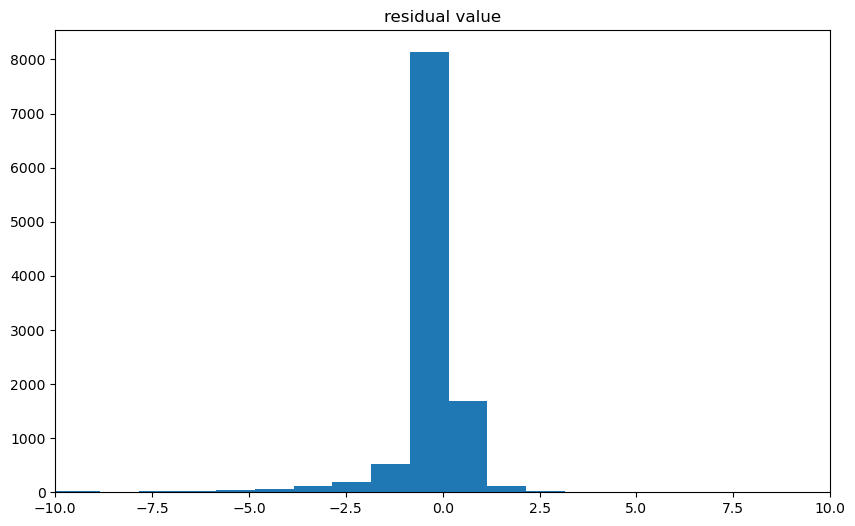

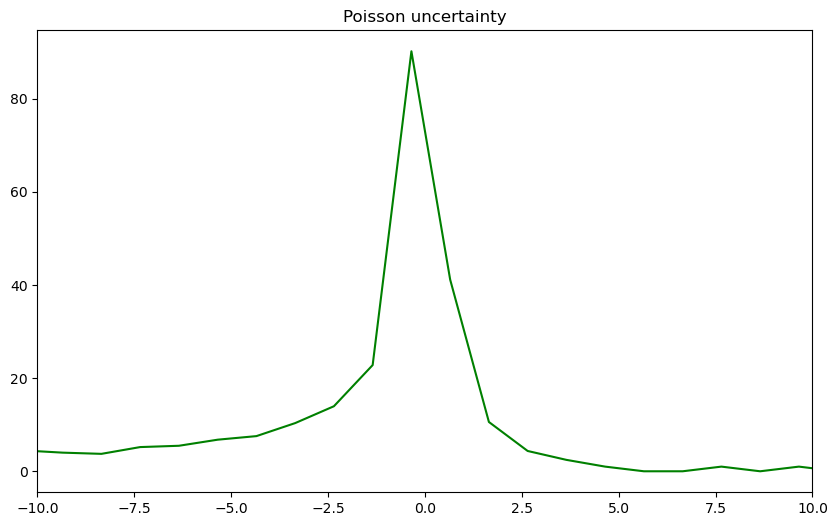

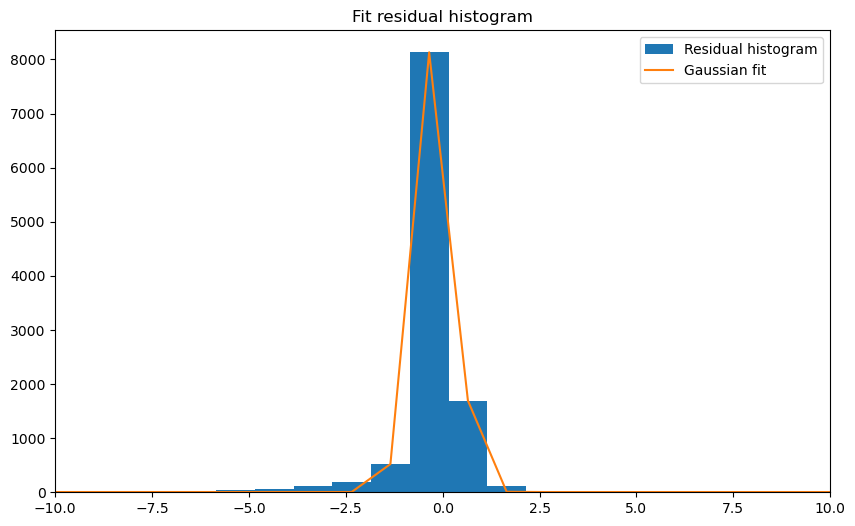

In [110]:
#import pickle
import pandas as pd
filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

data = pd.DataFrame(new_dict.tolist())
print(data)
fig, ax = plt.subplots(figsize=(10, 6))
residual = data['residuals']
b=np.arange(residual.min(), residual.max())
h, bins, _ = plt.hist(residual,bins=b)
plt.xlim(-10,10)
ax.set_title('residual value')

fig, ax = plt.subplots(figsize=(10, 6))
bins_centres = (bins[:-1] + bins[1:])/2.
sigma_y = np.sqrt(np.abs(h))
ax.plot(bins_centres, sigma_y, color="green")
plt.xlim(-10,10)
ax.set_title('Poisson uncertainty')

m = np.mean(h)
std = np.sqrt(np.var(h))
ampl = max(h) - min(h)
offset = min(h)
res, cov =optimize.curve_fit(f, bins_centres, h, [m,std,ampl,offset])

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(residual, bins=b, label='Residual histogram')
plt.plot(bins_centres, f(bins_centres, *res), label='Gaussian fit')
plt.xlim(-10,10)
ax.set_title('Fit residual histogram')
ax.legend()

In [111]:
# Goodness-of-fit test: p-values:
test_statist = np.sum((h-f(bins_centres, m, std, ampl, offset))**2/sigma_y)
print('Test statistics:', test_statist)

ndof = len(bins_centres) - 1
pvalue = 1. - stats.chi2.cdf(test_statist, ndof)
print("p-value =", pvalue) 
# As the p-value is < 0.05, the fit is considered unsatisfactory

Test statistics: inf
p-value = 0.0


/var/folders/dv/ctwb40g55qxf959xsh2gxtv80000gn/T/ipykernel_7355/3953997925.py:2: RuntimeWarning: divide by zero encountered in true_divide
  test_statist = np.sum((h-f(bins_centres, m, std, ampl, offset))**2/sigma_y)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [113]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-02 10:01:53--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6023:18::a27d:4312, 162.125.67.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6023:18::a27d:4312|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-02 10:01:53--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0420c291552cda9791bfb6fa42.dl.dropboxusercontent.com/cd/0/inline/BzzBvTQW4hyasNgoFzigTJDwKugECs0290dzntiyd-1MlPuTz6aCYlPhKfLhHpDrb86GeEMdAPe6vJon-7UTRK-XCAA6ajz47QJEcfdRqJ9yuMwYeFpvmr5aRYui547unXwLhL1fCBUL1up4O2sjOPBeN3BVGCeAMmREPui3vAGKRA/file# [following]
--2023-01-02 10:01:54--  https://uc0420c291552cda9791bfb6fa42.

Best fit values of the parameters
a =  9.99725714503683
b =  9.182847153695501
c =  9.253976704996564
The overall average of the temperatures between 2008 and 2012 is:  9.254051149780702
The daily average predicted by the model for the hottest time of year is:  19.25108941717672
The daily average predicted by the model for the coldest time of year is:  -0.7432744321645313


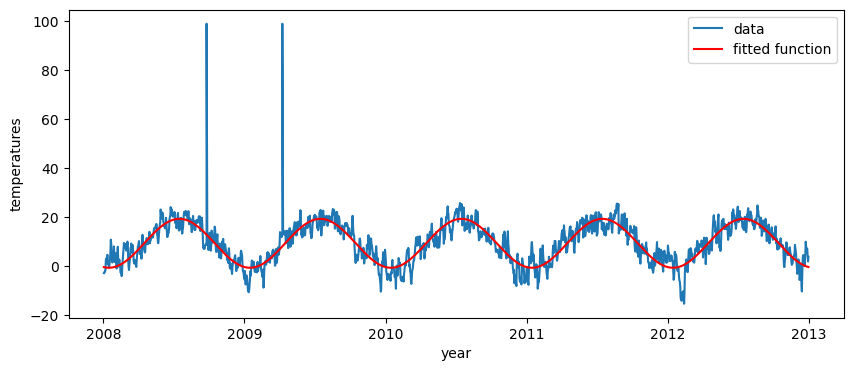

In [135]:
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t+b) +c

data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
mask = [(i[0]>=2008 and i[0]<2013) for i in data]
data_selected = data[mask]

plt.figure(figsize=(10, 4))
x = np.array([data_selected[i][0] for i in range(len(data_selected))]) #year
y = np.array([data_selected[i][1] for i in range(len(data_selected))]) #temperature       
plt.plot(x, y, label='data')
plt.xlabel('year')
plt.ylabel('temperatures')

# Let's remove the two values equal to 99 that represent a noise
a = [i for i in range(len(y)) if y[i] == 99]
x1 = np.delete(np.delete(x, a[1]), a[0])
y1 = np.delete(np.delete(y, a[1]), a[0])

# The best fit values of the parameters 
res, cov = optimize.curve_fit(f, x1, y1, [20, 10, 0],full_output=False)
plt.plot(x1, f(x1, *res), 'r-', label='fitted function')
plt.legend(loc='best')

print('Best fit values of the parameters')
print('a = ', res[0])
print('b = ', res[1])
print('c = ', res[2])

avg= np.average(y1)
print('The overall average of the temperatures between 2008 and 2012 is: ',avg)

val_hot = np.max(f(x1,res[0], res[1], res[2]))
val_cold = np.min(f(x1,res[0], res[1], res[2]))

print('The daily average predicted by the model for the hottest time of year is: ',val_hot)
print('The daily average predicted by the model for the coldest time of year is: ',val_cold)

# The change of parameter b makes the function moving horizontally (if b>0, the function is moving to the left 
# and the opposite for b<0). The b value corresponds to the phase. So it's needed to shift the sinusoidal function 
# over the time


The RSS for f is:  0.787079020862571
The RSS for g is:  0.7871330020467966
Test f vs g:
p-value: 0.876 , additional parameter necessary: NO


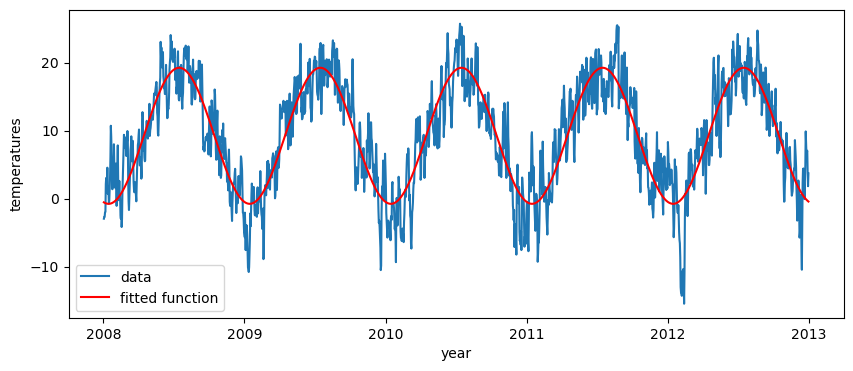

In [134]:
from scipy import stats

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t+c) +d

res2, cov2 = optimize.curve_fit(g, x1, y1, [20, 1, 10, 0],full_output=False)
plt.figure(figsize=(10, 4))
plt.plot(x1, y1, label='data')
plt.plot(x1, g(x1, *res2), 'r-', label='fitted function')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('temperatures')

# RSS
# For f:
y2_f = f(x1 ,res[0],res[1], res[2])
ssr_f = np.sum((y2_f - y1)**2)
tss_f = np.sum((np.mean(y1) - y1)**2)
rss_f = 1-ssr_f/tss_f
# For g:
y2_g = g(x1, res2[0],res2[1],res2[2],res2[3])
ssr_g = np.sum((y2_g - y1)**2)
tss_g = np.sum((np.mean(y1) - y1)**2)
rss_g = 1-ssr_g/tss_g
print('The RSS for f is: ', rss_f)
print('The RSS for g is: ', rss_g)
#It's the exact same value
ndof_f = 3 - 1 # n of parameters - 1
ndof_g = 4 - 1 # n of parameters - 1
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
N= 100
alpha = 0.05
print("Test f vs g:")
pval_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N,  True)

# Regarding the p-value, it's larger than alpha, the null hypothesis (the fit with the simpler function) cannot be rejected, 
# therefore the simpler function is considered sufficient to model the data.
# As the Fisher test confirms, the additional parameter is not necessary.